<a href="https://colab.research.google.com/github/plthiyagu/AI-Engineering/blob/master/12-Image%20and%20Video%20Analytics/Image_Classification_Model_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.analyticsvidhya.com/blog/2021/08/developing-an-image-classification-model-using-cnn/?utm_source=feedburner&utm_medium=email&utm_campaign=Feed%3A+AnalyticsVidhya+%28Analytics+Vidhya%29

In [1]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# To convert to categorical data
from tensorflow.keras.utils import to_categorical
#libraries for building model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout,Flatten
from tensorflow.keras.datasets import cifar10

In [2]:
#loading the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [3]:
#shape of the dataset
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
#checking the labels 
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

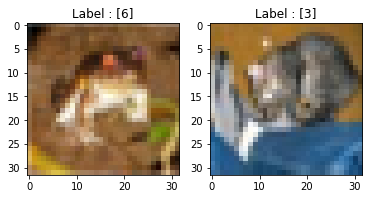

In [5]:
#first image of training data
plt.subplot(121)
plt.imshow(X_train[0])
plt.title("Label : {}".format(y_train[0]))
#first image of test data
plt.subplot(122)
plt.imshow(X_test[0])
plt.title("Label : {}".format(y_test[0]));

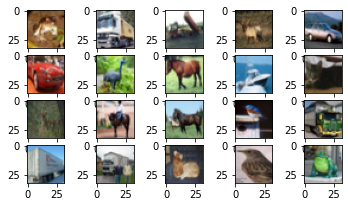

In [6]:
#visualizing the first 20 images in the dataset
for i in range(20):
    #subplot
    plt.subplot(5, 5, i+1)
    # plotting pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

Preprocessing Data

For data preprocessing we just need to perform two steps here, first is scaling the pixel values of images between 0 to 1, and the second is reshaping the labels to 1D from 2D



In [7]:
# Scale the data to lie between 0 to 1
X_train = X_train/255
X_test = X_test/255
print(X_train)

[[[[0.23137255 0.24313725 0.24705882]
   [0.16862745 0.18039216 0.17647059]
   [0.19607843 0.18823529 0.16862745]
   ...
   [0.61960784 0.51764706 0.42352941]
   [0.59607843 0.49019608 0.4       ]
   [0.58039216 0.48627451 0.40392157]]

  [[0.0627451  0.07843137 0.07843137]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509804 0.21568627]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117647 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215686 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941176 0.19607843]
   [0.47058824 0.32941176 0.19607843]
   [0.42745098 0.28627451 0.16470588]]

  ...

  [[0.81568627 0.66666667 0.37647059]
   [0.78823529 0.6        0.13333333]
   [0.77647059 0.63137255 0.10196078]
   ...
   [0.62745098 0.52156863 0.2745098 ]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333333 0.07843137]]

  [[0.70588235 0.54509804 0.37647059]
   [0.6

Step 2: Compiling the model


In [8]:
#reshaping the train and test lables to 1D
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

Step 1: Defining the model


In [9]:
model=Sequential()
#adding the first Convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
#adding Max pooling layer
model.add(MaxPool2D(2,2))
#adding another Convolution layer
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
#adding dense layer
model.add(Dense(216,activation='relu'))
#adding output layer
model.add(Dense(10,activation='softmax'))

In [10]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Step 3: Fitting the model


In [11]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 70s 44ms/step - loss: 1.4225 - accuracy: 0.4932
Epoch 2/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0426 - accuracy: 0.6344
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8921 - accuracy: 0.6884
Epoch 4/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7764 - accuracy: 0.7312
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.6823 - accuracy: 0.7654
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.6059 - accuracy: 0.7933
Epoch 7/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.5382 - accuracy: 0.8191
Epoch 8/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.4890 - accuracy: 0.8349
Epoch 9/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.4415 - accuracy: 0.8529
Epoch 10/10
1563/1563 [==============================] - 69s 44m

Step 4: Evaluating the model


In [12]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 1.2391 - accuracy: 0.6678


[1.239091396331787, 0.6678000092506409]

Step 5: Making Predictions


In [13]:
pred=model.predict(X_test)
#printing the first element from predicted data
print(pred[0])
#printing the index of 
print('Index:',np.argmax(pred[0]))

[0.01932541 0.2854512  0.03594473 0.11058955 0.01532927 0.10958948
 0.10977723 0.18184823 0.12903674 0.00310811]
Index: 1


In [14]:
y_classes = [np.argmax(element) for element in pred]
print('Predicted_values:',y_classes[:10])
print('Actual_values:',y_test[:10])

Predicted_values: [1, 8, 8, 0, 6, 6, 1, 6, 5, 9]
Actual_values: [3 8 8 0 6 6 1 6 3 1]


In [ ]:
model4=Sequential()
#adding the first Convolution layer
model4.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
#adding Max pooling layer
model4.add(MaxPool2D(2,2))
#adding dropout
model4.add(Dropout(0.2))
#adding another Convolution layer
model4.add(Conv2D(64,(3,3),activation='relu'))
model4.add(MaxPool2D(2,2))
#adding dropout
model4.add(Dropout(0.2))
model4.add(Flatten())
#adding dense layer
model4.add(Dense(216,activation='relu'))
#adding dropout
model4.add(Dropout(0.2))
#adding output layer
model4.add(Dense(10,activation='softmax'))
model4.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model4.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.4709 - accuracy: 0.4674
Epoch 2/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.1223 - accuracy: 0.6049
Epoch 3/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.9973 - accuracy: 0.6513
Epoch 4/10
1082/1563 [===================>..........] - ETA: 22s - loss: 0.9130 - accuracy: 0.6788

In [ ]:
model4.evaluate(X_test,y_test)